In [1]:
%pylab inline --no-import-all
import matplotlib.ticker as ticker
import matplotlib.pyplot as pl

import math
import numpy as np

import sys
sys.path.append("/usr/local/Cellar/root/6.12.04_1/lib/root/")
sys.path.append("/Library/Python/2.7/site-packages/")

import ROOT as r

Populating the interactive namespace from numpy and matplotlib
Welcome to JupyROOT 6.12/04


In [7]:
from matplotlib.ticker import LogLocator, FormatStrFormatter

def basicPlot(xs, ys, title, col='g'):
    fig = pl.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    plt.errorbar(xs, ys, marker='o', ls='None', yerr = np.sqrt(ys), c='black', markersize=10)
    pl.title(title)
    pl.xlim( 1e3, 8.5e3 )
    pl.ylim( 1,   1e6 )
    pl.xlabel('m_inv'+ '  [GeV]', fontsize=16)
    pl.ylabel('events', fontsize=16)

In [3]:
startingCut = 1100

In [4]:
input_file = r.TFile('/Users/jimenez/GS_data/GS_histograms_merged/physics_Main.root', 'OPEN')
input_hist = input_file.Get('NONE/h_2j_Minv')
ycounts = []
yerrs = []
xbins = []
xerrs = []
binedges = []
xbins_fullRange = []
xerrs_fullRange = []

for ib in range(1,input_hist.GetNbinsX()+1):
    xbins_fullRange.append(input_hist.GetBinCenter(ib))
    xerrs_fullRange.append(input_hist.GetBinLowEdge(ib+1)-input_hist.GetBinLowEdge(ib))
    
    if input_hist.GetBinCenter(ib)>startingCut:  
        ycounts.append(input_hist.GetBinContent(ib))
        yerrs.append(input_hist.GetBinError(ib))
        xbins.append(input_hist.GetBinCenter(ib))
        xerrs.append(input_hist.GetBinLowEdge(ib+1)-input_hist.GetBinLowEdge(ib))
        binedges.append(input_hist.GetBinLowEdge(ib))
input_file.Close()

ycounts = np.array(ycounts)
xbins = np.array(xbins)
xerrs = np.array(xerrs)
binedges = np.array(binedges)
xbins_fullRange = np.array(xbins_fullRange)
xerrs_fullRange = np.array(xerrs_fullRange)

np.save("inputs/ycounts.npy", ycounts)
np.save("inputs/yerrs.npy", yerrs)
np.save("inputs/xbins.npy", xbins)
np.save("inputs/xerrs.npy", xerrs)
np.save("inputs/binedges.npy", binedges)
np.save("inputs/xbins_fullRange.npy", xbins_fullRange)
np.save("inputs/xerrs_fullRange.npy", xerrs_fullRange)

In [5]:
binCenters = xbins_fullRange + np.append(np.diff(xbins_fullRange), np.diff(xbins_fullRange)[-1])/2

start_bin = np.argmax(binCenters > startingCut)

ycounts_fullRange = ycounts
ycounts_fullRange = np.concatenate((ycounts_fullRange[:start_bin], ycounts))

np.save("inputs/ycounts_fullRange.npy", ycounts_fullRange)
np.save("inputs/yerrs_fullRange.npy", np.sqrt(ycounts_fullRange))

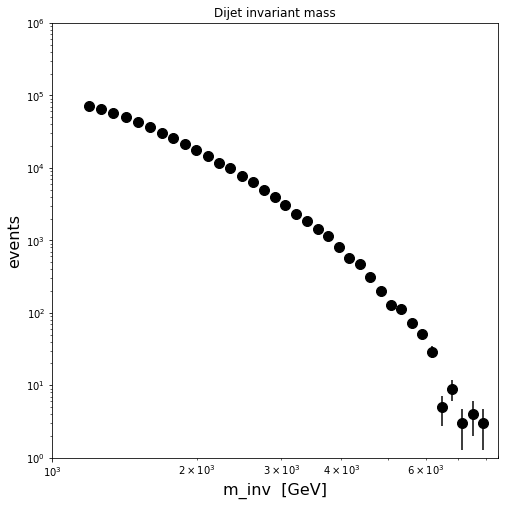

In [8]:
basicPlot(binCenters, ycounts_fullRange, 'Dijet invariant mass')